In [100]:
import pandas as pd
import numpy as np
import os
from sklearn.impute import SimpleImputer
from  sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.multioutput import MultiOutputClassifier 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
def load_dataset(file_path):
    return pd.read_sas(file_path, format="xport")

In [6]:
bp_data = load_dataset("BPXO_L.xpt")
bp_data

,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,130378.0,b'R',4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,79.0,82.0
1,130379.0,b'R',4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,71.0,73.0
2,130380.0,b'R',4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,83.0,77.0
3,130386.0,b'R',4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,64.0,64.0
4,130387.0,b'R',4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,80.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7796,142306.0,b'R',2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7797,142307.0,b'R',4.0,127.0,75.0,132.0,73.0,131.0,72.0,71.0,70.0,67.0
7798,142308.0,b'R',3.0,106.0,65.0,106.0,69.0,112.0,74.0,58.0,61.0,69.0
7799,142309.0,b'R',3.0,127.0,81.0,125.0,82.0,128.0,81.0,80.0,79.0,83.0


In [8]:
demo_data = load_dataset("DEMO_L.XPT")
demo_data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,142306.0,12.0,2.0,1.0,9.0,NaN,2.0,2.0,1.0,111.0,...,1.0,3.0,3.0,3.0,NaN,11147.192563,13459.129019,176.0,1.0,2.01
11929,142307.0,12.0,2.0,2.0,49.0,NaN,4.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,69419.620456,64962.328962,181.0,1.0,NaN
11930,142308.0,12.0,2.0,1.0,50.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,32696.313477,44367.534132,183.0,2.0,1.95
11931,142309.0,12.0,2.0,1.0,40.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,30547.974564,46249.361849,176.0,1.0,3.11


In [10]:
fertin_data = load_dataset("FERTIN_L.xpt")
fertin_data

,SEQN,WTPH2YR,LBXFER,LBDFERSI
0,130380.0,8.532884e+04,13.30,13.30
1,130381.0,5.397605e-79,NaN,NaN
2,130382.0,5.963893e+04,24.40,24.40
3,130388.0,3.286429e+04,NaN,NaN
4,130390.0,6.142701e+04,52.10,52.10
...,...,...,...,...
2559,142280.0,6.639765e+04,66.40,66.40
2560,142282.0,5.397605e-79,NaN,NaN
2561,142283.0,1.527882e+05,31.60,31.60
2562,142300.0,3.147068e+04,5.69,5.69


In [12]:
insurance_data = load_dataset("HIQ_L.xpt")
insurance_data

,SEQN,HIQ011,HIQ032A,HIQ032B,HIQ032C,HIQ032D,HIQ032E,HIQ032F,HIQ032H,HIQ032I,HIQ210
0,130378.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,130379.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,130380.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,1.0
3,130381.0,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.0
4,130382.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11928,142306.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11929,142307.0,1.0,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,2.0
11930,142308.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
11931,142309.0,1.0,1.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,2.0


In [14]:
creative_data = load_dataset("HSCRP_L.xpt")
creative_data

,SEQN,WTPH2YR,LBXHSCRP,LBDHRPLC
0,130378.0,5.604213e+04,1.78,5.397605e-79
1,130379.0,3.743571e+04,2.03,5.397605e-79
2,130380.0,8.532884e+04,5.62,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN
4,130382.0,5.963893e+04,NaN,NaN
...,...,...,...,...
8722,142306.0,5.397605e-79,NaN,NaN
8723,142307.0,6.899418e+04,4.30,5.397605e-79
8724,142308.0,5.397605e-79,NaN,NaN
8725,142309.0,4.628442e+04,0.53,5.397605e-79


In [16]:
kidney_condition_data = load_dataset("KIQ_U_L.xpt")
kidney_condition_data

,SEQN,KIQ022,KIQ025,KIQ005,KIQ010,KIQ042,KIQ044,KIQ052,KIQ481
0,130378.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130379.0,2.0,NaN,2.0,2.0,1.0,2.0,2.0,2.000000e+00
2,130380.0,2.0,NaN,1.0,NaN,2.0,2.0,NaN,2.000000e+00
3,130384.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130385.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7804,142305.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7805,142307.0,2.0,NaN,5.0,3.0,1.0,1.0,4.0,5.397605e-79
7806,142308.0,2.0,NaN,1.0,NaN,2.0,2.0,NaN,5.397605e-79
7807,142309.0,2.0,NaN,1.0,NaN,2.0,2.0,NaN,2.000000e+00


In [18]:
BDmass_data = load_dataset("BMX_L.xpt")
BDmass_data

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
0,130378.0,1.0,86.9,NaN,NaN,NaN,NaN,NaN,179.5,NaN,...,42.8,NaN,42.0,NaN,35.7,NaN,98.3,NaN,102.9,NaN
1,130379.0,1.0,101.8,NaN,NaN,NaN,NaN,NaN,174.2,NaN,...,38.5,NaN,38.7,NaN,33.7,NaN,114.7,NaN,112.4,NaN
2,130380.0,1.0,69.4,NaN,NaN,NaN,NaN,NaN,152.9,NaN,...,38.5,NaN,35.5,NaN,36.3,NaN,93.5,NaN,98.0,NaN
3,130381.0,1.0,34.3,NaN,NaN,NaN,NaN,NaN,120.1,NaN,...,NaN,NaN,25.4,NaN,23.4,NaN,70.4,NaN,NaN,NaN
4,130382.0,3.0,13.6,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855,142306.0,1.0,25.3,NaN,NaN,NaN,NaN,NaN,128.0,NaN,...,32.0,NaN,25.0,NaN,19.0,NaN,57.7,NaN,NaN,NaN
8856,142307.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,143.8,NaN,...,NaN,1.0,34.0,NaN,35.4,NaN,NaN,1.0,NaN,1.0
8857,142308.0,1.0,79.3,NaN,NaN,NaN,NaN,NaN,173.3,NaN,...,41.8,NaN,40.0,NaN,30.6,NaN,98.4,NaN,97.7,NaN
8858,142309.0,1.0,81.9,NaN,NaN,NaN,NaN,NaN,179.1,NaN,...,44.0,NaN,40.0,NaN,30.8,NaN,96.0,NaN,103.3,NaN


In [20]:
vitD_data = load_dataset("VID_L.xpt")
vitD_data

,SEQN,WTPH2YR,LBXVIDMS,LBDVIDLC,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC
0,130378.0,5.604213e+04,58.9,5.397605e-79,1.57,1.0,57.3,5.397605e-79,2.47,5.397605e-79
1,130379.0,3.743571e+04,60.5,5.397605e-79,1.57,1.0,58.9,5.397605e-79,3.40,5.397605e-79
2,130380.0,8.532884e+04,39.4,5.397605e-79,1.57,1.0,37.8,5.397605e-79,1.52,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,5.963893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8722,142306.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8723,142307.0,6.899418e+04,147.0,5.397605e-79,1.57,1.0,145.0,5.397605e-79,15.90,5.397605e-79
8724,142308.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8725,142309.0,4.628442e+04,17.8,5.397605e-79,1.57,1.0,16.2,5.397605e-79,0.78,5.397605e-79


In [22]:
Preg_data = load_dataset('UCPREG_L.xpt')
Preg_data

,SEQN,URXPREG
0,130380.0,2.0
1,130388.0,2.0
2,130390.0,2.0
3,130391.0,2.0
4,130395.0,2.0
...,...,...
1129,142208.0,2.0
1130,142263.0,2.0
1131,142269.0,2.0
1132,142280.0,2.0


In [24]:
data = demo_data.merge(fertin_data, on='SEQN')
data = data.merge(creative_data, on = 'SEQN')
data = data.merge(kidney_condition_data, on = 'SEQN')
data = data.merge(insurance_data, on = 'SEQN')
data = data.merge(vitD_data, on = 'SEQN')
data = data.merge(BDmass_data, on = 'SEQN')
data = data.merge(Preg_data, on = 'SEQN')
data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP,URXPREG
0,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,35.5,NaN,36.3,NaN,93.5,NaN,98.0,NaN,2.0
1,130388.0,12.0,2.0,2.0,27.0,NaN,4.0,4.0,1.0,NaN,...,NaN,39.5,NaN,45.7,NaN,118.5,NaN,134.0,NaN,2.0
2,130390.0,12.0,2.0,2.0,31.0,NaN,3.0,3.0,2.0,NaN,...,NaN,40.4,NaN,46.0,NaN,131.0,NaN,138.5,NaN,2.0
3,130391.0,12.0,2.0,2.0,33.0,NaN,3.0,3.0,2.0,NaN,...,NaN,38.0,NaN,41.8,NaN,123.8,NaN,138.9,NaN,2.0
4,130395.0,12.0,2.0,2.0,33.0,NaN,5.0,7.0,2.0,NaN,...,NaN,36.0,NaN,45.2,NaN,142.5,NaN,146.1,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,142208.0,12.0,2.0,2.0,28.0,NaN,3.0,3.0,1.0,NaN,...,NaN,36.5,NaN,36.0,NaN,104.4,NaN,110.0,NaN,2.0
1130,142263.0,12.0,2.0,2.0,44.0,NaN,3.0,3.0,2.0,NaN,...,NaN,33.3,NaN,26.3,NaN,80.4,NaN,95.0,NaN,2.0
1131,142269.0,12.0,2.0,2.0,32.0,NaN,4.0,4.0,2.0,NaN,...,NaN,38.0,NaN,53.1,NaN,149.3,NaN,147.2,NaN,2.0
1132,142280.0,12.0,2.0,2.0,23.0,NaN,5.0,7.0,2.0,NaN,...,NaN,39.7,NaN,36.4,NaN,124.1,NaN,130.0,NaN,2.0


In [26]:
data = data.drop_duplicates(subset='SEQN') 
data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP,URXPREG
0,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,35.5,NaN,36.3,NaN,93.5,NaN,98.0,NaN,2.0
1,130388.0,12.0,2.0,2.0,27.0,NaN,4.0,4.0,1.0,NaN,...,NaN,39.5,NaN,45.7,NaN,118.5,NaN,134.0,NaN,2.0
2,130390.0,12.0,2.0,2.0,31.0,NaN,3.0,3.0,2.0,NaN,...,NaN,40.4,NaN,46.0,NaN,131.0,NaN,138.5,NaN,2.0
3,130391.0,12.0,2.0,2.0,33.0,NaN,3.0,3.0,2.0,NaN,...,NaN,38.0,NaN,41.8,NaN,123.8,NaN,138.9,NaN,2.0
4,130395.0,12.0,2.0,2.0,33.0,NaN,5.0,7.0,2.0,NaN,...,NaN,36.0,NaN,45.2,NaN,142.5,NaN,146.1,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,142208.0,12.0,2.0,2.0,28.0,NaN,3.0,3.0,1.0,NaN,...,NaN,36.5,NaN,36.0,NaN,104.4,NaN,110.0,NaN,2.0
1130,142263.0,12.0,2.0,2.0,44.0,NaN,3.0,3.0,2.0,NaN,...,NaN,33.3,NaN,26.3,NaN,80.4,NaN,95.0,NaN,2.0
1131,142269.0,12.0,2.0,2.0,32.0,NaN,4.0,4.0,2.0,NaN,...,NaN,38.0,NaN,53.1,NaN,149.3,NaN,147.2,NaN,2.0
1132,142280.0,12.0,2.0,2.0,23.0,NaN,5.0,7.0,2.0,NaN,...,NaN,39.7,NaN,36.4,NaN,124.1,NaN,130.0,NaN,2.0


In [28]:
data.columns = data.columns.str.strip().str.lower()

In [34]:
missing_percent = data.isnull().mean() 
cols_to_drop = missing_percent[missing_percent>0.5].index.tolist()
data = data.drop(columns = cols_to_drop)

missing_percent = data.insull().mean()
cols_to_drop = missing_percent[missing_percent>0.5].index.tolist()
data = data.drop(column = cols_to_drop)

In [36]:
data

,seqn,sddsrvyr,ridstatr,riagendr,ridageyr,ridreth1,ridreth3,ridexmon,dmqmiliz,dmdborn4,...,bmdstats,bmxwt,bmxht,bmxbmi,bmxleg,bmxarml,bmxarmc,bmxwaist,bmxhip,urxpreg
0,130380.0,12.0,2.0,2.0,44.0,2.0,2.0,1.0,2.0,2.0,...,1.0,69.4,152.9,29.7,38.5,35.5,36.3,93.5,98.0,2.0
1,130388.0,12.0,2.0,2.0,27.0,4.0,4.0,1.0,2.0,1.0,...,1.0,123.7,168.2,43.7,40.0,39.5,45.7,118.5,134.0,2.0
2,130390.0,12.0,2.0,2.0,31.0,3.0,3.0,2.0,1.0,1.0,...,1.0,122.7,163.3,46.0,34.0,40.4,46.0,131.0,138.5,2.0
3,130391.0,12.0,2.0,2.0,33.0,3.0,3.0,2.0,2.0,1.0,...,1.0,116.3,172.8,38.9,35.6,38.0,41.8,123.8,138.9,2.0
4,130395.0,12.0,2.0,2.0,33.0,5.0,7.0,2.0,2.0,1.0,...,1.0,138.4,159.2,54.6,36.2,36.0,45.2,142.5,146.1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,142208.0,12.0,2.0,2.0,28.0,3.0,3.0,1.0,2.0,1.0,...,1.0,88.1,159.0,34.8,35.5,36.5,36.0,104.4,110.0,2.0
1130,142263.0,12.0,2.0,2.0,44.0,3.0,3.0,2.0,2.0,1.0,...,1.0,61.3,164.8,22.6,37.0,33.3,26.3,80.4,95.0,2.0
1131,142269.0,12.0,2.0,2.0,32.0,4.0,4.0,2.0,2.0,1.0,...,3.0,152.4,NaN,NaN,39.5,38.0,53.1,149.3,147.2,2.0
1132,142280.0,12.0,2.0,2.0,23.0,5.0,7.0,2.0,2.0,1.0,...,1.0,112.9,171.4,38.4,41.6,39.7,36.4,124.1,130.0,2.0


In [52]:
numeric_cols = data.select_dtypes(include = ['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns
num_imputer = SimpleImputer(strategy = 'median')
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

In [54]:
data

,seqn,sddsrvyr,ridstatr,riagendr,ridageyr,ridreth1,ridreth3,ridexmon,dmqmiliz,dmdborn4,...,bmdstats,bmxwt,bmxht,bmxbmi,bmxleg,bmxarml,bmxarmc,bmxwaist,bmxhip,urxpreg
0,130380.0,12.0,2.0,2.0,44.0,2.0,2.0,1.0,2.0,2.0,...,1.0,69.4,152.9,29.7,38.5,35.5,36.3,93.5,98.0,2.0
1,130388.0,12.0,2.0,2.0,27.0,4.0,4.0,1.0,2.0,1.0,...,1.0,123.7,168.2,43.7,40.0,39.5,45.7,118.5,134.0,2.0
2,130390.0,12.0,2.0,2.0,31.0,3.0,3.0,2.0,1.0,1.0,...,1.0,122.7,163.3,46.0,34.0,40.4,46.0,131.0,138.5,2.0
3,130391.0,12.0,2.0,2.0,33.0,3.0,3.0,2.0,2.0,1.0,...,1.0,116.3,172.8,38.9,35.6,38.0,41.8,123.8,138.9,2.0
4,130395.0,12.0,2.0,2.0,33.0,5.0,7.0,2.0,2.0,1.0,...,1.0,138.4,159.2,54.6,36.2,36.0,45.2,142.5,146.1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,142208.0,12.0,2.0,2.0,28.0,3.0,3.0,1.0,2.0,1.0,...,1.0,88.1,159.0,34.8,35.5,36.5,36.0,104.4,110.0,2.0
1130,142263.0,12.0,2.0,2.0,44.0,3.0,3.0,2.0,2.0,1.0,...,1.0,61.3,164.8,22.6,37.0,33.3,26.3,80.4,95.0,2.0
1131,142269.0,12.0,2.0,2.0,32.0,4.0,4.0,2.0,2.0,1.0,...,3.0,152.4,0.0,0.0,39.5,38.0,53.1,149.3,147.2,2.0
1132,142280.0,12.0,2.0,2.0,23.0,5.0,7.0,2.0,2.0,1.0,...,1.0,112.9,171.4,38.4,41.6,39.7,36.4,124.1,130.0,2.0


In [56]:
filtered_data = data[data['riagendr'] != 1.0]
filtered_data

,seqn,sddsrvyr,ridstatr,riagendr,ridageyr,ridreth1,ridreth3,ridexmon,dmqmiliz,dmdborn4,...,bmdstats,bmxwt,bmxht,bmxbmi,bmxleg,bmxarml,bmxarmc,bmxwaist,bmxhip,urxpreg
0,130380.0,12.0,2.0,2.0,44.0,2.0,2.0,1.0,2.0,2.0,...,1.0,69.4,152.9,29.7,38.5,35.5,36.3,93.5,98.0,2.0
1,130388.0,12.0,2.0,2.0,27.0,4.0,4.0,1.0,2.0,1.0,...,1.0,123.7,168.2,43.7,40.0,39.5,45.7,118.5,134.0,2.0
2,130390.0,12.0,2.0,2.0,31.0,3.0,3.0,2.0,1.0,1.0,...,1.0,122.7,163.3,46.0,34.0,40.4,46.0,131.0,138.5,2.0
3,130391.0,12.0,2.0,2.0,33.0,3.0,3.0,2.0,2.0,1.0,...,1.0,116.3,172.8,38.9,35.6,38.0,41.8,123.8,138.9,2.0
4,130395.0,12.0,2.0,2.0,33.0,5.0,7.0,2.0,2.0,1.0,...,1.0,138.4,159.2,54.6,36.2,36.0,45.2,142.5,146.1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,142208.0,12.0,2.0,2.0,28.0,3.0,3.0,1.0,2.0,1.0,...,1.0,88.1,159.0,34.8,35.5,36.5,36.0,104.4,110.0,2.0
1130,142263.0,12.0,2.0,2.0,44.0,3.0,3.0,2.0,2.0,1.0,...,1.0,61.3,164.8,22.6,37.0,33.3,26.3,80.4,95.0,2.0
1131,142269.0,12.0,2.0,2.0,32.0,4.0,4.0,2.0,2.0,1.0,...,3.0,152.4,0.0,0.0,39.5,38.0,53.1,149.3,147.2,2.0
1132,142280.0,12.0,2.0,2.0,23.0,5.0,7.0,2.0,2.0,1.0,...,1.0,112.9,171.4,38.4,41.6,39.7,36.4,124.1,130.0,2.0


In [114]:
filtered_data.columns

x= filtered_data.drop(columns=['hiq011','hiq032a','hiq210'])
y= data[['hiq011','hiq032a', 'hiq210']]
print("printing x values")
print(x)
print("printing y values")
print(y)

filtered_data.sum()

printing x values
          seqn  sddsrvyr  ridstatr  riagendr  ridageyr  ridreth1  ridreth3  \
0     130380.0      12.0       2.0       2.0      44.0       2.0       2.0   
1     130388.0      12.0       2.0       2.0      27.0       4.0       4.0   
2     130390.0      12.0       2.0       2.0      31.0       3.0       3.0   
3     130391.0      12.0       2.0       2.0      33.0       3.0       3.0   
4     130395.0      12.0       2.0       2.0      33.0       5.0       7.0   
...        ...       ...       ...       ...       ...       ...       ...   
1129  142208.0      12.0       2.0       2.0      28.0       3.0       3.0   
1130  142263.0      12.0       2.0       2.0      44.0       3.0       3.0   
1131  142269.0      12.0       2.0       2.0      32.0       4.0       4.0   
1132  142280.0      12.0       2.0       2.0      23.0       5.0       7.0   
1133  142283.0      12.0       2.0       2.0      29.0       5.0       7.0   

      ridexmon  dmqmiliz  dmdborn4  ...  bmds

seqn         1.547371e+08
sddsrvyr     1.360800e+04
ridstatr     2.268000e+03
riagendr     2.268000e+03
ridageyr     3.756100e+04
ridreth1     3.514000e+03
ridreth3     3.739000e+03
ridexmon     1.710000e+03
dmqmiliz     2.243000e+03
dmdborn4     1.387000e+03
dmdeduc2     4.577000e+03
dmdmartz     2.193000e+03
ridexprg     2.255000e+03
dmdhhsiz     3.721000e+03
wtint2yr     4.181708e+07
wtmec2yr     5.497164e+07
sdmvstra     2.042810e+05
sdmvpsu      1.721000e+03
indfmpir     2.536550e+03
wtph2yr_x    5.487146e+07
lbxfer       6.668248e+04
lbdfersi     6.668248e+04
wtph2yr_y    5.487146e+07
lbxhscrp     5.115060e+03
lbdhrplc     9.000000e+00
kiq022       2.253000e+03
kiq005       1.619000e+03
kiq042       1.463000e+03
kiq044       1.625000e+03
kiq481       1.161000e+03
hiq011       1.263000e+03
hiq032a      2.336000e+03
hiq210       1.952000e+03
wtph2yr      5.487146e+07
lbxvidms     6.998153e+04
lbdvidlc     5.570329e-76
lbxvd2ms     4.369040e+03
lbdvd2lc     7.460000e+02
lbxvd3ms    

In [116]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)  # scale the feature

In [118]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x_scaled)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)
print(x_train, y_train)

[[ 1.05523126  0.          0.         ... -0.2124857   0.16699453
   0.13814255]
 [ 1.15891797  0.          0.         ... -0.39424378 -0.54192367
   0.13814255]
 [-0.15023698  0.          0.         ... -0.49910421  0.0536971
   0.13814255]
 ...
 [ 1.70672457  0.          0.         ... -0.36278565 -0.27000984
   0.13814255]
 [ 0.90484146  0.          0.         ...  2.1119205   2.05744308
   0.13814255]
 [ 1.67206442  0.          0.         ...  0.1615165   0.33532214
   0.13814255]]       hiq011  hiq032a  hiq210
911      2.0      0.0     0.0
959      1.0      1.0     2.0
486      1.0      0.0     2.0
1034     2.0      0.0     0.0
704      1.0      1.0     2.0
...      ...      ...     ...
1044     1.0      1.0     2.0
1095     1.0      1.0     2.0
1130     1.0      1.0     2.0
860      1.0      0.0     2.0
1126     2.0      0.0     0.0

[793 rows x 3 columns]


In [120]:
model = LogisticRegression(class_weight='balanced', max_iter=10000)
model= MultiOutputClassifier(model)
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                   max_iter=10000))

In [122]:
y_pred = model.predict(x_test)

In [124]:
# Evaluate the model
print("🔍 Accuracy per target label:")
for i, col in enumerate(y.columns):
    acc = accuracy_score(y_test[col], y_pred[:, i])
    print(f"{col}: {acc:.4f}")

for i, col in enumerate(y.columns):
    print(f"\n📊 Classification report for {col}:")
    print(classification_report(y_test[col], y_pred[:, i], zero_division=1))

🔍 Accuracy per target label:
hiq011: 0.7449
hiq032a: 0.6012
hiq210: 0.5015

📊 Classification report for hiq011:
              precision    recall  f1-score   support

         1.0       0.94      0.77      0.84       307
         2.0       0.20      0.53      0.29        34

    accuracy                           0.74       341
   macro avg       0.57      0.65      0.57       341
weighted avg       0.86      0.74      0.79       341


📊 Classification report for hiq032a:
              precision    recall  f1-score   support

         0.0       0.66      0.52      0.58       149
         1.0       0.76      0.67      0.71       189
        77.0       1.00      0.00      0.00         2
        99.0       0.00      0.00      0.00         1

    accuracy                           0.60       341
   macro avg       0.60      0.30      0.32       341
weighted avg       0.71      0.60      0.65       341


📊 Classification report for hiq210:
              precision    recall  f1-score   suppo

In [126]:
output_dir = "image"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

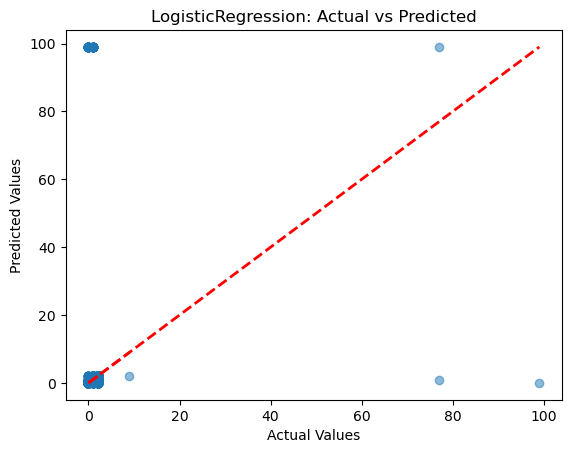

In [128]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("LogisticRegression: Actual vs Predicted")
plt.show()

In [130]:
png_path = os.path.join(output_dir, 'bias.png')
plt.savefig(png_path, bbox_inches='tight', dpi=300)
print(f"Pie chart exported as PNG to: {png_path}")

Pie chart exported as PNG to: image\bias.png


<Figure size 640x480 with 0 Axes>